***UN PROBLEMA, DOS SOLUCIONES***

***Problema: definir muchos tipos específicos de algo en partícular.***

***La idea es separar la parte estructural de la algorítmica***

***EJEMPLOS:*** 

***Auto -> Porsche, Chevrolet, Toyota, Kia, Ford...***

***Formato informe -> HTML, PDF, Texto Plano...***

***Libros -> Diccionario, Novela, Comic, Científico...***

***MISMO PROBLEMA QUE STRATEGY***

***Template_Method usa herencia en lugar de agregación***

Por ejemplo, imaginemos un usuario nos pide un reporte en formato html, podriamos implementar algo como esto

In [2]:
class Report
  def initialize
    @title = 'Monthly Report'
    @text =  [ 'Things are going', 'really, really well.', 'algo mas']
  end

  def output_report
    puts('<html>')
    puts('  <head>')
    puts("    <title>#{@title}</title>")
    puts('  </head>')
    puts('  <body>')
    @text.each do |line|
      puts("    <p>#{line}</p>")
    end
    puts('  </body>')
    puts('</html>')
  end

end 

report = Report.new
report.output_report

<html>
  <head>
    <title>Monthly Report</title>
  </head>
  <body>
    <p>Things are going</p>
    <p>really, really well.</p>
    <p>algo mas</p>
  </body>
</html>


Pero si luego nos piden el mismo informe en otro formato, tipo texto plano o pdf, tendría que modificar todo?

El problema es que estamos definiendo toda la clase Report como un solo tipo de formato. 

Tenemos que definir la clase Report sin un método definido, sino dejando que otras clases ( en este codigo "HTMLReport" y "PlainTextReport") puedan heredar de ella y plantear su propio formato. De esta forma, tendremos clases que sólo definen formatos y estas heredan de Report.

Definimos Report sin un formato, solo con la posibilidad que lo hereden para usarlo con un formato específico.

**Es el paralelo con definir Auto y que se herede a clases como porsche, toyota, chevrolet...**

In [5]:
class Report
  def initialize
    @title = 'Monthly Report'
    @text =  ['Things are going', 'really, really well.', 'algo mas']
  end

  def output_report
    output_start
    output_head
    output_body_start
    output_body
    output_body_end
    output_end
  end 
  def output_body
    @text.each do |line|
      output_line(line)
    end
  end 
  def output_start
    raise 'Called abstract method: output_start'
  end 
  def output_head
    raise 'Called abstract method: output_head'
  end 
  def output_body_start
    raise 'Called abstract method: output_body_start'
  end 
  def output_line(line)
    raise 'Called abstract method: output_line'
  end 
  def output_body_end
    raise 'Called abstract method: output_body_end'
  end 
  def output_end
    raise 'Called abstract method: output_end'
  end 
end 

:output_end

Ahora definimos los formatos, HTML y Plain text, que heredan de Report.

In [6]:
class HTMLReport < Report
  def output_start
    puts('<html>')
  end
  def output_head
    puts('  <head>')
    puts("    <title>#{@title}</title>")
    puts('  </head>')
  end 
  def output_body_start
    puts('<body>')
  end 
  def output_line(line)
    puts("  <p>#{line}</p>")
  end 
  def output_body_end
    puts('</body>')
  end 
  def output_end
    puts('</html>')
  end 
end 

class PlainTextReport < Report
  def output_start
  end
  def output_head
    puts("==== #{@title} ===")
    puts
  end 
  def output_body_start
  end
  
  def output_line(line)
    puts(line)
  end 
  def output_body_end
  end

  def output_end
  end 
end 

puts "-" * 50
report = HTMLReport.new
report.output_report

puts "-" * 50
report = PlainTextReport.new
report.output_report

--------------------------------------------------
<html>
  <head>
    <title>Monthly Report</title>
  </head>
<body>
  <p>Things are going</p>
  <p>really, really well.</p>
  <p>algo mas</p>
</body>
</html>
--------------------------------------------------
==== Monthly Report ===

Things are going
really, really well.
algo mas


Patrón permite variación en cómo se implementan los pasos manteniendo la estructura del proceso 

Subclases especializan el proceso

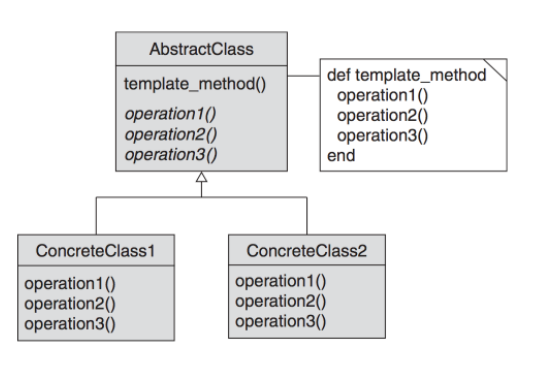

***La gracia de todo esto es poder tener la parte de algoritmos fuera de la parte de la estructura, de manera de tener una especie de "algoritmos enchufables" a una estructura.***